<a href="https://colab.research.google.com/github/arkeodev/nlp/blob/main/Embeddings/embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unraveling the World of Embeddings

In the realm of artificial intelligence, embeddings serve as the cornerstone for translating various types of data into a language that machines can understand. From the intricacies of human language to the complexities of images and sounds, embeddings transform raw data into dense vectors, paving the way for nuanced machine comprehension. This article explores the multifaceted world of embeddings, encompassing text, images, and audio, highlighting their development, applications, and how they're fine-tuned for specific tasks.

<figure>
    <img src="https://raw.githubusercontents.com/arkeodev/nlp/main/Embeddings/images/embeddings.png" width="900" height="400" alt="Embeddings">
    <figcaption>Embeddings</figcaption>
</figure>

## The Evolution of Text Representation Techniques

The evolution of text representation techniques in machine learning from simple models like One-Hot Encoding, Bag of Words (BoW), and Term Frequency-Inverse Document Frequency (TF-IDF) to complex embeddings illustrates a journey towards capturing the nuances of language more effectively.

Each method addressed specific limitations of its predecessors, adding layers of sophistication and bringing us closer to a more profound understanding of text semantics.

Here will not be addressed for the details of each of these techniques. It can be got more information in the Blog Article called [Step by Step Guide to Master NLP – Word Embedding and Text Vectorization](https://www.analyticsvidhya.com/blog/2021/06/part-5-step-by-step-guide-to-master-nlp-text-vectorization-approaches/#) for each of them.



### 1. One-Hot Encoding

**Description**: In one-hot encoding, each word in the vocabulary is represented by a vector where one element is set to 1, and the rest are set to 0. The vector's length equals the size of the vocabulary, and each word is assigned a unique position in this vector space.



**Advantages**:
- **Base Method**: Being the foundational method, one-hot encoding's main advantage was its straightforward approach to turning text data into a numerical form that machine learning algorithms could process.
- **Simplicity**: Easy to understand and implement.
- **Uniqueness**: Each word is uniquely represented, with no overlap between representations.

**Disadvantages**:
- **Sparsity**: One-hot vectors are extremely sparse, leading to inefficient use of memory and computational resources, especially with large vocabularies.
- **No Semantic Information**: This method does not capture any semantic relationships between words. Words are treated as independent entities, making it impossible to gauge similarity or relatedness.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Example vocabulary
words = np.array(['cat', 'dog', 'bird', 'fish']).reshape(-1, 1)

# One-hot encode
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(words)

print(one_hot_encoded)


[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


### 2. Bag of Words (BoW)

**Description**: The Bag of Words model represents text as an unordered collection of words, disregarding grammar and word order but keeping multiplicity. A document is represented by a vector indicating the frequency of each word from the vocabulary in the document.



**Advantages**:
- **Frequency Information**: Captures the frequency of words in the document, providing more information than one-hot encoding.
- **Simplicity**: Still relatively simple to understand and implement.
- BoW addressed the lack of information in one-hot encoding by incorporating word frequency, which offered a basic form of "importance" to words in a document.

**Disadvantages**:
- **Sparsity and Dimensionality**: Similar to one-hot encoding, BoW vectors can become very sparse and high-dimensional with large vocabularies, leading to inefficiencies.
- **Lack of Context and Order**: BoW does not account for the order of words, losing important syntactic and semantic information. It treats "dog bites man" and "man bites dog" identically.
- **No Semantic Relationships**: BoW cannot capture semantic relationships or the meaning of words within the context of a sentence.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample text
documents = ["the cat sat on the mat", "the dog sat on the log"]

# Create and fit the CountVectorizer to the documents
vectorizer = CountVectorizer()

# This step generates the vocabulary and transforms the documents into a sparse matrix
bow = vectorizer.fit_transform(documents)

# Vocabulary mapping: word -> column index
vocabulary = vectorizer.vocabulary_

# Print the vocabulary to understand how words are indexed
print("Vocabulary:")
for word, index in sorted(vocabulary.items(), key=lambda item: item[1]):
    print(f"{word}: {index}")

# Convert the BoW sparse matrix to a dense array and print it
dense_bow = bow.toarray()
print("\nBag of Words representation (dense array):")
print(dense_bow)

# Explain the output based on the vocabulary
print("\nInterpreting the BoW representation:")
print("Each row in the dense array corresponds to a document.")
print("Each column represents a word from the vocabulary, in the order printed above.")
print("Values represent how many times each word appears in each document.")

# For a more detailed explanation
print("\nDetailed explanation for the first document:")
print(documents[0])
for word, index in sorted(vocabulary.items(), key=lambda item: item[1]):
    print(f"The word '{word}' appears {dense_bow[0, index]} time(s).")

Vocabulary:
cat: 0
dog: 1
log: 2
mat: 3
on: 4
sat: 5
the: 6

Bag of Words representation (dense array):
[[1 0 0 1 1 1 2]
 [0 1 1 0 1 1 2]]

Interpreting the BoW representation:
Each row in the dense array corresponds to a document.
Each column represents a word from the vocabulary, in the order printed above.
Values represent how many times each word appears in each document.

Detailed explanation for the first document:
the cat sat on the mat
The word 'cat' appears 1 time(s).
The word 'dog' appears 0 time(s).
The word 'log' appears 0 time(s).
The word 'mat' appears 1 time(s).
The word 'on' appears 1 time(s).
The word 'sat' appears 1 time(s).
The word 'the' appears 2 time(s).


### 3. Term Frequency-Inverse Document Frequency (TF-IDF)

**Description**: TF-IDF builds upon BoW by weighting the word frequencies based on how commonly they appear across documents. Words that appear frequently in a document but less frequently across multiple documents are given higher importance.

**Advantages**:
- **Weighted Importance**: Weights word frequencies to highlight words that are important in a document but not common across all documents.
- **Reduces Impact of Common Words**: Helps mitigate the effect of commonly used words that may not contribute much to the overall meaning of documents.
- TF-IDF built on BoW's frequency counts by adding a weighting scheme that emphasizes the significance of words based on their distribution across documents, thus providing a rudimentary form of context sensitivity.

**Disadvantages**:
- **Still Lacks Context and Semantics**: While TF-IDF provides a way to highlight more "important" words, it still doesn't capture word meanings, relationships, or the context within which words appear.
- **High Dimensionality**: Like BoW, TF-IDF suffers from high dimensionality issues, leading to sparse representations that can be computationally expensive to work with.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample text
documents = ["the cat sat on the mat", "the dog sat on the log"]

# Create and fit the TfidfVectorizer to the documents
tfidf_vectorizer = TfidfVectorizer()

# This step generates the vocabulary and transforms the documents into a TF-IDF-weighted sparse matrix
tfidf = tfidf_vectorizer.fit_transform(documents)

# Vocabulary mapping: word -> column index
vocabulary = tfidf_vectorizer.vocabulary_

# Print the vocabulary to understand how words are indexed
print("Vocabulary:")
for word, index in sorted(vocabulary.items(), key=lambda item: item[1]):
    print(f"{word}: {index}")

# Convert the TF-IDF sparse matrix to a dense array and print it
dense_tfidf = tfidf.toarray()
print("\nTF-IDF representation (dense array):")
print(dense_tfidf)

# Explain the output based on the vocabulary
print("\nInterpreting the TF-IDF representation:")
print("Each row in the dense array corresponds to a document.")
print("Each column represents a word from the vocabulary, in the order printed above.")
print("Values are the TF-IDF weights, representing the importance of each word in each document relative to the corpus.")

# For a more detailed explanation
print("\nDetailed explanation for the first document:")
print(documents[0])
for word, index in sorted(vocabulary.items(), key=lambda item: item[1]):
    print(f"The word '{word}' has a TF-IDF weight of {dense_tfidf[0, index]:.4f} in the first document.")

Vocabulary:
cat: 0
dog: 1
log: 2
mat: 3
on: 4
sat: 5
the: 6

TF-IDF representation (dense array):
[[0.44554752 0.         0.         0.44554752 0.31701073 0.31701073
  0.63402146]
 [0.         0.44554752 0.44554752 0.         0.31701073 0.31701073
  0.63402146]]

Interpreting the TF-IDF representation:
Each row in the dense array corresponds to a document.
Each column represents a word from the vocabulary, in the order printed above.
Values are the TF-IDF weights, representing the importance of each word in each document relative to the corpus.

Detailed explanation for the first document:
the cat sat on the mat
The word 'cat' has a TF-IDF weight of 0.4455 in the first document.
The word 'dog' has a TF-IDF weight of 0.0000 in the first document.
The word 'log' has a TF-IDF weight of 0.0000 in the first document.
The word 'mat' has a TF-IDF weight of 0.4455 in the first document.
The word 'on' has a TF-IDF weight of 0.3170 in the first document.
The word 'sat' has a TF-IDF weight of 0.3

### 4. N-Grams

**Description**: N-grams are sequences of *n* contiguous items from a given sample of text or speech. In text processing, these items are typically words or characters. N-grams help capture local context and sequence information within text data, providing a foundation for modeling language beyond individual words.

**Advantages**:

- **Contextual Information**: N-grams incorporate context by considering sequences of words or characters, capturing more information about language structure than individual words.
- **Improved Language Modeling**: By analyzing sequences of words, n-grams allow for better prediction of the next item in a sequence, enhancing language modeling tasks.
- **Flexibility and Simplicity**: N-grams offer a simple yet flexible approach to text representation, allowing adjustments in granularity by changing the value of *n*.

**Disadvantages**:

- **Explosion of Features**: As *n* increases, the number of possible n-grams can grow exponentially, leading to high-dimensional feature spaces and computational challenges.
- **Fixed Window Size**: N-grams capture context within a fixed window size (*n*), which may not always align with the actual scope of contextual dependencies in text.
- **Lack of Deep Semantic Understanding**: While n-grams can model the presence and co-occurrence of sequences, they lack the ability to capture deeper semantic relationships in the way that embeddings do.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample text
documents = ["the cat sat on the mat", "the dog sat on the log"]

# Create and fit the CountVectorizer to the documents with bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))

# Generate the vocabulary and transform the documents into a sparse matrix of bigrams
bigrams = vectorizer.fit_transform(documents)

# Vocabulary mapping: bigram -> column index
vocabulary = vectorizer.vocabulary_

# Print the vocabulary to understand how bigrams are indexed
print("Vocabulary (Bigrams):")
for bigram, index in sorted(vocabulary.items(), key=lambda item: item[1]):
    print(f"{bigram}: {index}")

# Convert the sparse matrix to a dense array and print it
dense_bigrams = bigrams.toarray()
print("\nBigram representation (dense array):")
print(dense_bigrams)

# Explain the output based on the vocabulary
print("\nInterpreting the Bigram representation:")
print("Each row in the dense array corresponds to a document.")
print("Each column represents a bigram from the vocabulary, in the order printed above.")
print("Values represent how many times each bigram appears in each document.")

Vocabulary (Bigrams):
cat sat: 0
dog sat: 1
on the: 2
sat on: 3
the cat: 4
the dog: 5
the log: 6
the mat: 7

Bigram representation (dense array):
[[1 0 1 1 1 0 0 1]
 [0 1 1 1 0 1 1 0]]

Interpreting the Bigram representation:
Each row in the dense array corresponds to a document.
Each column represents a bigram from the vocabulary, in the order printed above.
Values represent how many times each bigram appears in each document.


### 5. Transition to Embeddings

While the aforementioned methods provided essential advancements, they still fell short in capturing the complex semantics of language, contextual nuances, and the relationships between words. **Embeddings** emerged as a solution to these limitations by offering:

- **Dense Representations**: Unlike the sparse representations of previous methods, embeddings are dense, significantly reducing dimensionality and improving computational efficiency.
- **Semantic Information**: Embeddings capture not just the presence of words but their meanings, nuances, and the relationships between them, based on how they're used in large corpora.
- **Context Awareness**: With the advent of context-based embeddings (like those from BERT), the representation can vary depending on the word's usage, capturing its meaning more accurately in different contexts.

## Types of Embeedings

Embeddings are powerful tools in machine learning and natural language processing that convert various types of data into dense vector representations, making it easier for models to process and analyze. Here's a brief overview of the types of vector embeddings:

1. **Word Embeddings**
- **Description**: Represent individual words as vectors.
- **Techniques**: Word2Vec, GloVe, FastText.
- **Applications**: Semantic analysis, natural language processing tasks.

2. **Sentence Embeddings**
- **Description**: Represent entire sentences as vectors.
- **Models**: Universal Sentence Encoder (USE), SkipThought.
- **Applications**: Sentence similarity, sentiment analysis, document classification.

3. **Document Embeddings**
- **Description**: Represent longer texts like articles, papers, or books as vectors.
- **Techniques**: Doc2Vec, Paragraph Vectors.
- **Applications**: Document classification, information retrieval, content analysis.

4. **Image Embeddings**
- **Description**: Represent images as vectors by capturing visual features.
- **Techniques**: Convolutional Neural Networks (CNNs), ResNet, VGG.
- **Applications**: Image classification, object detection, image similarity.

5. **Audio Embeddings**
- **Description**: Represent audio signals or sounds as vectors by capturing their acoustic features and characteristics. Audio embeddings translate the complex, time-series data of audio files into a structured, high-dimensional space where similar sounds are represented by vectors that are close to each other.
- **Techniques**: Deep learning models like WaveNet, Transformer-based models, and spectrogram-based CNNs.
- **Applications**: Speech recognition, music classification, sound event detection, speaker identification, and emotion analysis from voice.
- **Purpose**: Capture the nuances of audio content, including the tone, pitch, rhythm, and other acoustic properties, enabling machines to understand and process audio data effectively.

6. **User Embeddings**
- **Description**: Represent users in a system or platform as vectors.
- **Applications**: Recommendation systems, personalized marketing, user segmentation.
- **Purpose**: Capture user preferences, behaviors, and characteristics.

7. **Product Embeddings**
- **Description**: Represent products in e-commerce or recommendation systems as vectors.
- **Applications**: Product recommendation, comparison, and analysis.
- **Purpose**: Capture product attributes, features, and semantic information.

8. **Multi-Modal Embeddings**
- **Description**: Represent data that combines information from multiple modalities (e.g., text, images, audio) as vectors. Multi-modal embeddings aim to capture the complementary and shared information across different types of data.
- **Techniques**: Fusion techniques in deep learning that might involve early fusion, late fusion, or hybrid approaches to integrate features from multiple neural network branches, each processing a different modality. Transformer-based models are increasingly used for their ability to handle sequences of different data types.
- **Applications**: Cross-modal information retrieval (e.g., finding images based on text descriptions), automatic captioning of images and videos, visual question answering (VQA), and enhanced recommendation systems that consider visual, textual, and auditory information.

  Multi-modal embeddings are at the forefront of advancing AI's ability to understand and interact with the world in a more human-like manner. By effectively combining information from various sources, these embeddings facilitate a deeper understanding of content, context, and user intentions, paving the way for innovative applications that span across text, vision, and audio domains.

- **Purpose**: Leverage the strengths of different data types to improve the performance of tasks that require understanding complex relationships between them, providing a richer representation of the data than would be possible with a single modality.


## The Context Based Embeddings vs. Word Based Embeddings

Context-based embeddings and word-based embeddings are two approaches for representing words in natural language processing (NLP) tasks. Both aim to convert text into numerical vectors, but they differ significantly in how they capture the meaning and usage of words in language. Understanding these differences is crucial for selecting the appropriate technique for various NLP applications.

### Word-Based Embeddings

Word-based embeddings, like Word2Vec and GloVe, generate a single vector representation for each word in the vocabulary, regardless of its context in a sentence. These embeddings are learned from the statistical properties of words' co-occurrence patterns in a corpus.

- **Examples**: Word2Vec, GloVe, FastText.
- **Characteristics**:
  - **Static**: Each word is assigned a single embedding vector, which doesn't change based on the word's context in different sentences.
  - **Pre-trained**: Often learned from a large corpus of text and then applied or fine-tuned for specific tasks.
  - **Semantic Similarity**: Embeddings capture semantic similarity based on the co-occurrence of words. Words that appear in similar contexts tend to have vectors that are close in the embedding space.

### Context-Based (Contextual) Embeddings

Context-based embeddings, like those produced by BERT, generate representations for words that vary depending on the words' context. This means that the same word can have different embeddings when used in different sentences, reflecting its different uses or meanings.

- **Examples**: BERT, GPT (all versions), ELMo, RoBERTa, Transformer-XL.
- **Characteristics**:
  - **Dynamic or Contextual**: The embedding for a word or token is influenced by the other words in its context, allowing the model to capture nuances like polysemy (words having multiple meanings) and syntax.
  - **Model Architecture**: Typically derived from deep learning models based on the Transformer architecture, which allows the model to consider the entire context of a word by using self-attention mechanisms.
  - **Application**: Beyond providing rich, nuanced word representations, these models can be fine-tuned for a wide range of NLP tasks, such as question answering, text classification, and more.

### Comparison and Usage

- **Word-Based vs. Context-Based**: Word-based embeddings are simpler and less computationally intensive to use but lack the nuanced understanding of language that context-based embeddings provide. Context-based embeddings, while more powerful, require significantly more computational resources both for training and inference.
- **Choice of Embedding**: The choice between word-based and context-based embeddings depends on the specific requirements of your task, the computational resources available, and the level of semantic understanding required. Word-based embeddings might be sufficient for tasks with limited context or when working with constrained resources, while context-based embeddings are preferred for tasks requiring a deep understanding of language context and nuance.

## What do "Words" Mean According to the Tokenisation?

When discussing embeddings in the context of natural language processing (NLP), the term "words" can indeed refer to actual words, but depending on the tokenization strategy, it can also refer to subwords or characters. This distinction is important because different models and approaches to embeddings might treat the input text in varied ways, leading to different representations

### Words

- **Traditional Approach**: Initially, embeddings were primarily focused on words as the basic units of language, with each unique word in the vocabulary getting its own vector representation.
- **Tokenization**: Involves splitting text into individual words based on spaces and punctuation.

### Subwords

- **Models like BERT and GPT**: These models often use subword tokenization strategies (e.g., Byte-Pair Encoding (BPE), SentencePiece, WordPiece) to handle the vocabulary more efficiently.
- **Advantages**: Subword tokenization helps deal with the problem of out-of-vocabulary (OOV) words by breaking down unknown words into known subword units, allowing the model to generate embeddings for words it hasn't explicitly seen during training.
- **Example**: The word "unbelievable" might be tokenized into "un", "##believ", and "##able".

### Characters

- **Character-Level Models**: Some models and approaches operate at the character level, treating each character as the basic unit for generating embeddings.
- **Applications**: Character-level embeddings are particularly useful in tasks like named entity recognition (NER) in languages with rich morphology, or in models focusing on spelling and phonetics.

### Implications of Different Tokenizations for Embeddings

- **Flexibility and Coverage**: Subword and character-level tokenization offer more flexibility and better coverage of the language, especially for languages with large vocabularies or agglutinative languages where words can have many forms.
- **Context Sensitivity**: Regardless of whether embeddings are generated for words, subwords, or characters, context-based embedding models can dynamically adjust the representation based on the surrounding text. This means that the same subword or character can have different embeddings depending on its context, enhancing the model's ability to capture nuanced meanings.
- **Computational Efficiency**: Subword and character-level approaches can improve computational efficiency by reducing the size of the vocabulary that the model needs to handle directly, albeit at the cost of potentially increased complexity in processing sequences.

## Training an Embedding

### Conceptual Overview

At its core, `nn.Embedding` creates a lookup table where each row corresponds to an embedding for a specific item in your vocabulary. The parameters `num_embeddings` and `embedding_dim` define the shape of this table:

- **`num_embeddings`**: This is the size of the lookup table and effectively the size of your vocabulary. It's the total number of unique items (e.g., words) that you want to embed.
- **`embedding_dim`**: This specifies the dimensionality of each embedding vector. It's how many numbers will represent each item in the embedding space.

In [5]:
import torch
import torch.nn as nn

# Define a simple model that includes an Embedding layer
class SimpleEmbeddingModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(SimpleEmbeddingModel, self).__init__()
        # The Embedding layer: 10 words in vocab, 5-dimensional embeddings
        self.embeddings = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim)

    def forward(self, input):
        return self.embeddings(input)

# Parameters
vocab_size = 10  # Size of the vocabulary
embedding_dim = 5  # Dimensionality of the embeddings

# Create an instance of the model
model = SimpleEmbeddingModel(vocab_size, embedding_dim)

# Sample input: indices for words in the vocabulary
# Let's say our input consists of indices for two words from our vocabulary
input_indices = torch.tensor([2, 5], dtype=torch.long)

# Get embeddings for the input
embeddings = model(input_indices)

print("Input Indices:", input_indices)
print("Embeddings:\n", embeddings)

Input Indices: tensor([2, 5])
Embeddings:
 tensor([[ 0.1753,  0.7546, -0.1105, -1.4256,  1.3238],
        [-0.2482, -0.1961, -1.8618, -0.0753,  1.4812]],
       grad_fn=<EmbeddingBackward0>)


### Internals and Operation

1. **Initialization**: When an `nn.Embedding` layer is instantiated, it initializes a matrix (or table) of shape `(num_embeddings, embedding_dim)`. Each row of this matrix is the embedding of one item in your vocabulary. The initialization can be random or based on some predefined logic (PyTorch defaults to random initialization with values from a uniform distribution).

2. **Lookup Process**: The operation performed by the embedding layer is essentially a lookup. When the layer receives integer indices (either a single integer or a batch of them), it returns the corresponding row(s) from its embedding matrix. This process is efficiently implemented and does not involve any computation like matrix multiplication or addition, just direct retrieval of rows based on the indices.

3. **Learning**: Although the embedding matrix is initialized randomly, it's part of the model's parameters and gets updated during training through backpropagation. The learning process adjusts the values of these embeddings to minimize the model's loss function, effectively tuning the embeddings to capture meaningful semantic relationships as dictated by the task at hand.

4. **Gradient Update**: During backpropagation, gradients are calculated for the embeddings used in the forward pass, and the embeddings are updated accordingly. This means that the embeddings are fine-tuned to better represent the relationships in the data as seen by the model.

### Practical Implications

- **Embedding Lookup**: The simplicity of the lookup process makes embedding layers highly efficient for transforming categorical data into dense vectors. This is especially valuable in NLP, where dealing with large vocabularies and sparse one-hot encoded vectors would be computationally expensive and memory-intensive.

- **Semantic Space**: The learned embeddings ideally represent the items in a semantic space where the distances between items reflect their semantic similarity. For example, in a well-trained model, words with similar meanings should be closer together in the embedding space.

- **Generalization**: Embeddings can capture and generalize relationships in the data, making the model capable of handling unseen data better. For example, words used in similar contexts will end up with similar embeddings, even if the model has not seen them together during training.

## Fine-Tuning: Customizing Embeddings

### Fine-Tuning for Domains and Tasks

Contextualized embeddings generated by transformer models can be fine-tuned for specific domains or tasks, and this is a common practice in natural language processing (NLP) to achieve state-of-the-art results on a wide range of tasks.

### Fine-Tuning Process

Fine-tuning involves taking a pre-trained transformer model, which has learned general language representations from a large corpus of text, and continuing the training process on a smaller, task-specific dataset. This allows the model to adjust its weights, including the embeddings, to better capture the nuances and terminology of the specific domain or task. Here's a general overview of how fine-tuning works:


1. **Start with a Pre-trained Model**: You begin with a model that has been pre-trained on a large, general-purpose dataset. This model has developed a broad understanding of the language, including its syntax and semantics.

2. **Select a Task-specific Dataset**: You then choose a smaller dataset that is specific to your task or domain. This dataset could be related to medical texts, legal documents, customer reviews, etc., depending on your needs.

3. **Continue Training**: The pre-trained model is then trained (or fine-tuned) on this task-specific dataset. During this process, all parts of the model, including the initial word embeddings and the transformer layers that produce the contextualized embeddings, are updated to better align with the specifics of the task or domain.

4. **Adjust Learning Rate**: It's common practice to use a smaller learning rate during fine-tuning than was used during the initial pre-training. This helps prevent the model from "forgetting" its general understanding of the language while it learns the specifics of the new task.

5. **Evaluation and Adjustment**: After fine-tuning, the model is evaluated on a separate validation set to ensure it has effectively adapted to the task. Adjustments may be made to the training process based on this evaluation to improve performance.

### Benefits of Fine-Tuning

- **Improved Performance**: Fine-tuning allows the model to adapt its pre-learned language representations to the specific lexical and syntactical characteristics of a domain or task, often leading to improved performance compared to using a pre-trained model directly.

- **Efficiency**: Because the model has already learned a lot of general language knowledge during pre-training, fine-tuning on a specific task requires relatively less data and computational resources compared to training a model from scratch.

- **Flexibility**: This approach is flexible and can be applied across different tasks (e.g., text classification, question answering, named entity recognition) and domains (e.g., finance, healthcare, law) by simply changing the task-specific dataset used for fine-tuning.



### Conclusion

Fine-tuning contextualized embeddings and transformer models on specific domains or tasks is a powerful technique in NLP. It leverages the broad language understanding acquired during pre-training and specializes the model to perform well on tasks that require more specific knowledge or understanding.

## Word Based Embeddings

In the evolving landscape of Natural Language Processing (NLP), the quest for efficient and effective word representation has been a central pursuit. This journey saw a pivotal turn with the introduction of the Neural Language Model (NLM) by Bengio et al., which laid the groundwork for subsequent innovations in word embedding techniques. Among these, Word2Vec emerged as a groundbreaking approach, heralded for its simplicity and computational efficiency. But what spurred this evolution from Bengio's initial model to the streamlined architecture of Word2Vec?

Yoshua Bengio and his colleagues proposed a novel idea: to represent words from a vocabulary through learnable vectors within a feed-forward neural network, featuring an embedding layer, hidden layers, and a softmax function. This model was transformative, allowing the embedding layer to generate word embeddings through a shallow network, optimizing the vectors via backpropagation. The architecture was designed to capture the nuances of language, predicting the probability distribution of words across a vast vocabulary.

However, the brilliance of Bengio's model came with a computational caveat. The architecture, particularly between the hidden layer and the projection layer, demanded significant computational resources. The reasons were twofold: the projection yielded dense values, and the hidden layer was tasked with computing probability distributions for every word in the vocabulary—a monumental feat for any model.

### Word2Vec

In 2013, Mikolov et al. introduced Word2Vec, a model designed to address the computational challenges of Bengio's NLM. Word2Vec simplified the architecture by eliminating the hidden layer, yet retained the shared projection layer for all words, mirroring Bengio's approach. This simplification meant that, without the complexities of a full neural network, the model might not capture data representations as precisely with smaller datasets. However, with ample data, Word2Vec proved exceptionally adept at accurately modeling language within the embedding space. Moreover, this streamlined model significantly reduced complexity, enabling the processing of larger datasets with greater efficiency.

Word2Vec offered two distinct architectures:

- **Continuous Bag-of-Words Model (CBOW)**: This model predicts a target word based on its context, effectively using surrounding words to understand and forecast the focal word.

<figure>
    <img src="https://raw.githubusercontents.com/arkeodev/nlp/main/Embeddings/images/cbow.png" width="400" height="400" alt="Continous Bag of Words">
    <figcaption>Continous Bag of Words</figcaption>
</figure>

- **Continuous Skip-gram Model**: In contrast, the Skip-gram model takes a target word to predict its surrounding context, offering a mirror approach to CBOW with its focus on leveraging a word to understand its contextual landscape.

<figure>
    <img src="https://raw.githubusercontents.com/arkeodev/nlp/main/Embeddings/images/skipgram.png" width="400" height="400" alt="Skipgram">
    <figcaption>Skipgram</figcaption>
</figure>

#### Continuous Bag of Words Implementation

Epoch: 10, Loss: 0.07928615267240051
Epoch: 20, Loss: 0.024136333223567275
Epoch: 30, Loss: 0.014015396964142396
Epoch: 40, Loss: 0.009792187254524964
Epoch: 50, Loss: 0.007487807918906859


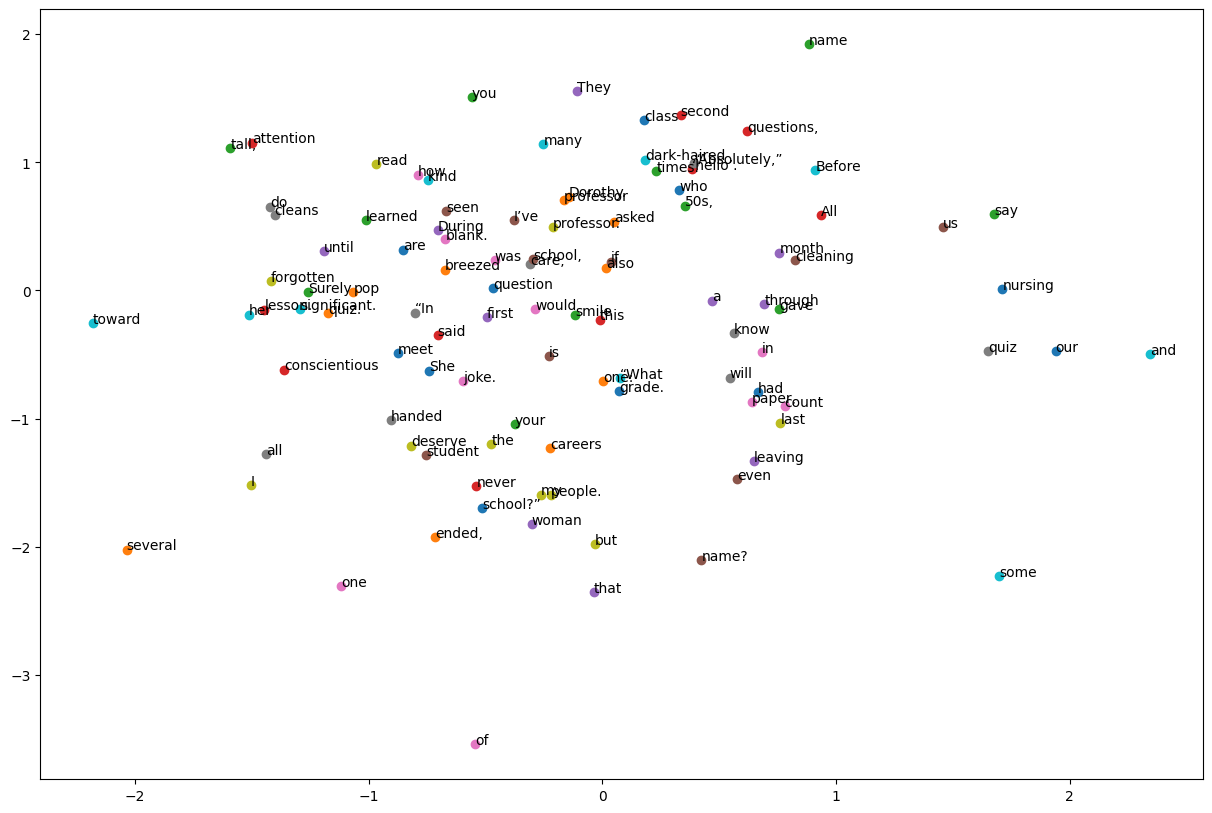

Accuracy: 100.0% (138/138)


In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Define the Corpus Processing Functions
def make_context_vector(context, word_to_ix):
    """Convert a list of words into a tensor of numerical indices."""
    idxs = [word_to_ix[w] for w in context]
    return torch.tensor(idxs, dtype=torch.long)

def preprocess_corpus(raw_text):
    """Tokenize and preprocess the raw text corpus."""
    vocab = set(raw_text)
    word_to_ix = {word: ix for ix, word in enumerate(vocab)}
    return vocab, word_to_ix

def create_cbow_data(raw_text, window_size=2):
    """Generate context-target pairs for CBOW training."""
    data = []
    for i in range(window_size, len(raw_text) - window_size):
        context = [
            raw_text[i - j] for j in range(window_size, 0, -1)
        ] + [
            raw_text[i + j + 1] for j in range(window_size)
        ]
        target = raw_text[i]
        data.append((context, target))
    return data

# Define the CBOW Model
class CBOWModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(CBOWModel, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(embedding_dim, 128)
        self.activation_function1 = nn.ReLU()
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = sum(self.embeddings(inputs)).view(1,-1)
        out = self.linear1(embeds)
        out = self.activation_function1(out)
        out = self.linear2(out)
        return out

    def get_word_embedding(self, word):
        word = torch.tensor([word_to_ix[word]])
        return self.embeddings(word).view(1,-1)

# Define raw text
raw_text = """During my second month of nursing school, our professor gave us a pop quiz.
I was a conscientious student and had breezed through the questions, until I read the last one:
“What is the first name of the woman who cleans the school?”  Surely this was some kind of joke.
I had seen the cleaning woman several times. She was tall, dark-haired and in her 50s, but how would I know her name?
I handed in my paper, leaving the last question blank.  Before class ended, one student asked if the last question would count toward our quiz grade.
“Absolutely,” said the professor.  “In your careers you will meet many people. All are significant. They deserve your attention and care,
even if all you do is smile and say ‘hello’. I’ve never forgotten that lesson. I also learned her name was Dorothy.""".split()

# Preprocess Corpus
vocab, word_to_ix = preprocess_corpus(raw_text)
data = create_cbow_data(raw_text)
vocab_size = len(vocab)
EMBEDDING_DIM = 100

# Initialize Model, Loss Function, and Optimizer
model = CBOWModel(vocab_size, EMBEDDING_DIM)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training Loop
for epoch in range(50):
    total_loss = 0
    for context, target in data:
        context_vector = make_context_vector(context, word_to_ix)
        log_probs = model(context_vector)
        loss = loss_function(log_probs, torch.tensor([word_to_ix[target]], dtype=torch.long))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if epoch % 10 == 9:
        print(f"Epoch: {epoch+1}, Loss: {total_loss / len(data)}")

# Visualization of Word Embeddings
plt.figure(figsize=(15,10))
for word in vocab:
    embedding = model.get_word_embedding(word).detach().numpy()[0]
    plt.scatter(embedding[0], embedding[1])
    plt.annotate(word, (embedding[0], embedding[1]))
plt.show()

# Testing Function
def test_cbow(model, data, word_to_ix):
    """Test the CBOW model accuracy."""
    correct_count = 0
    for context, target in data:
        context_vector = make_context_vector(context, word_to_ix)
        log_probs = model(context_vector)
        predictions = torch.argmax(log_probs, 1)
        if predictions[0] == word_to_ix[target]:
            correct_count += 1
    accuracy = correct_count / len(data) * 100
    print(f'Accuracy: {accuracy:.1f}% ({correct_count}/{len(data)})')

test_cbow(model, data, word_to_ix)

#### SkipGram Implementation

177it [00:00, 319.34it/s]

Epoch: 100, Loss: 2.680122


211it [00:00, 287.99it/s]

Epoch: 200, Loss: 1.798808


339it [00:01, 311.44it/s]

Epoch: 300, Loss: 1.374056


453it [00:01, 320.33it/s]

Epoch: 400, Loss: 1.512240


543it [00:01, 370.81it/s]

Epoch: 500, Loss: 1.966803


638it [00:02, 358.08it/s]

Epoch: 600, Loss: 1.641085


763it [00:02, 353.17it/s]

Epoch: 700, Loss: 2.673958


854it [00:02, 380.26it/s]

Epoch: 800, Loss: 1.103904
Epoch: 900, Loss: 1.195719


1000it [00:03, 329.92it/s]


Epoch: 1000, Loss: 1.456771


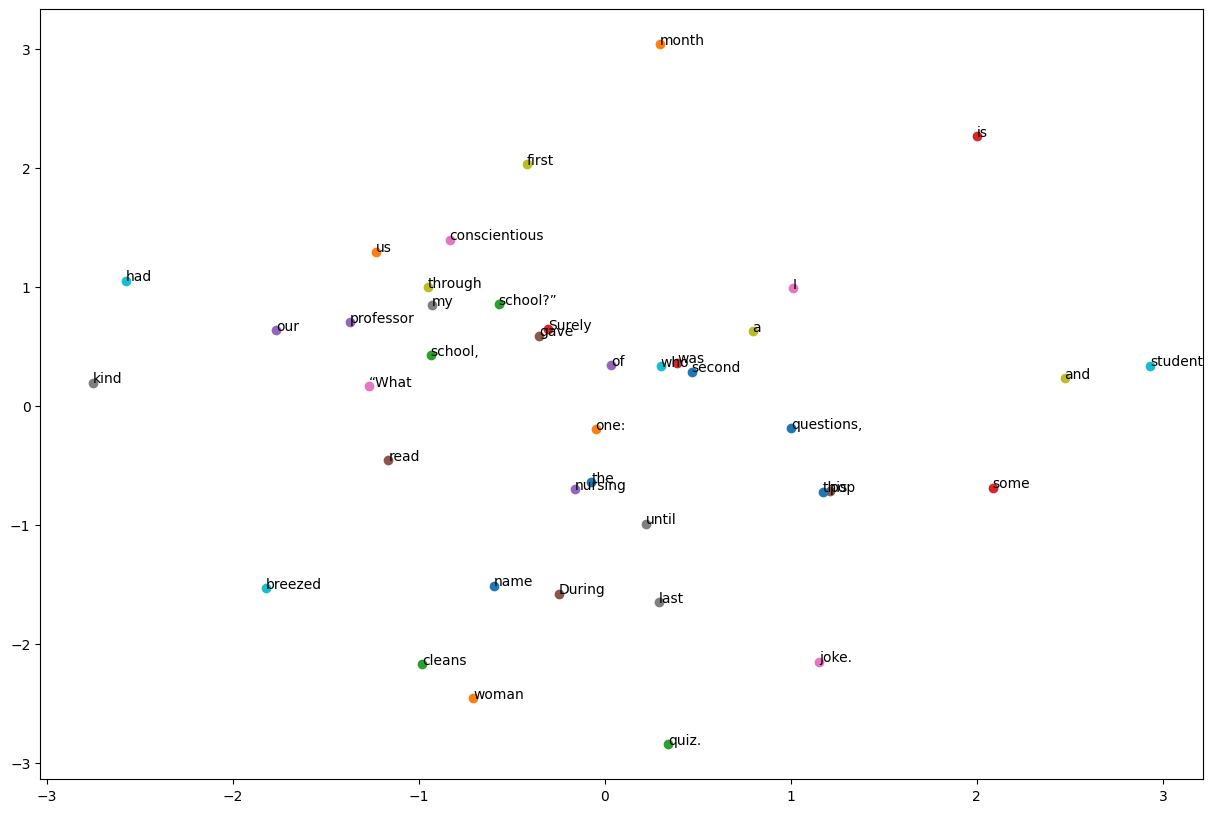

Generated sentence: Surely school?” the is “What is “What


In [4]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm

# Data
sentences = """During my second month of nursing school, our professor gave us a pop quiz.
I was a conscientious student and had breezed through the questions, until I read the last one:
“What is the first name of the woman who cleans the school?”  Surely this was some kind of joke."""

# Preprocess the sentences
def preprocess_sentences(sentences):
    word_sequence = sentences.split()
    word_list = list(set(word_sequence))
    word_dict = {w: i for i, w in enumerate(word_list)}
    return word_sequence, word_list, word_dict

word_sequence, word_list, word_dict = preprocess_sentences(sentences)

# Generate Skip-gram pairs
def generate_skipgram_pairs(word_sequence, window_size=1):
    skip_grams = []
    for idx in range(window_size, len(word_sequence) - window_size):
        target = word_dict[word_sequence[idx]]
        contexts = [word_dict[word_sequence[idx - window_size]], word_dict[word_sequence[idx + window_size]]]
        for context in contexts:
            skip_grams.append([target, context])
    return skip_grams

# Random batch generation
def random_batch(skip_grams, batch_size):
    random_samples = np.random.choice(len(skip_grams), batch_size, replace=False)
    random_inputs = [skip_grams[i][0] for i in random_samples]
    random_labels = [skip_grams[i][1] for i in random_samples]
    return torch.LongTensor(random_inputs), torch.LongTensor(random_labels)

# Define the Skip-gram Model
class SkipgramModel(nn.Module):
    def __init__(self, voc_size, embedding_size):
        super(SkipgramModel, self).__init__()
        self.embedding = nn.Embedding(voc_size, embedding_size)
        self.W = nn.Linear(embedding_size, embedding_size, bias=False)
        self.WT = nn.Linear(embedding_size, voc_size, bias=False)

    def forward(self, X):
        X = self.embedding(X)
        X = nn.functional.relu(self.W(X))
        X = self.WT(X)
        return X

    def get_word_embedding(self, word):
        word_id = torch.LongTensor([word_dict[word]])
        return self.embedding(word_id)

# Model, Loss, and Optimizer
voc_size = len(word_list)
model = SkipgramModel(voc_size, embedding_size=10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training Loop
skip_grams = generate_skipgram_pairs(word_sequence)
for epoch in tqdm(range(1000), total=len(skip_grams)):
    input_batch, target_batch = random_batch(skip_grams, batch_size=2)
    output = model(input_batch)
    loss = criterion(output, target_batch)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch: {epoch + 1}, Loss: {loss.item():.6f}')

# Visualization of Word Embeddings
plt.figure(figsize=(15,10))
for word in word_list:
    embedding = model.get_word_embedding(word).detach().numpy()[0]
    plt.scatter(embedding[0], embedding[1])
    plt.annotate(word, (embedding[0], embedding[1]))
plt.show()

# Generate a sentence
sentence = "Surely"
generated_sentence = [sentence]

for _ in range(6):
    pred_word_id = torch.argmax(model(torch.LongTensor([word_dict[generated_sentence[-1]]])))
    pred_word = word_list[pred_word_id.item()]
    generated_sentence.append(pred_word)

print('Generated sentence:', ' '.join(generated_sentence))

## Context Based Embeddings

## Conclusion


Embeddings have emerged as fundamental to advancing artificial intelligence, enabling machines to process and understand the vast complexities of human language, visual content, and sound. By continually refining these representations and tailoring them to specific applications, we unlock new potentials for AI to interact with the world in increasingly sophisticated and intuitive ways. The journey of embeddings, from simple vector representations to complex, context-aware models, illustrates the ongoing evolution of machine intelligence and its boundless future prospects.

## References

- The Illustrated Word2vec: https://jalammar.github.io/illustrated-word2vec/
- For the pre-embedding techniques: [Step by Step Guide to Master NLP – Word Embedding and Text Vectorization](https://www.analyticsvidhya.com/blog/2021/06/part-5-step-by-step-guide-to-master-nlp-text-vectorization-approaches/#)
- A Neural Probabilistic Language Model: https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf
- Distributed Representations of Words and Phrases
and their Compositionality: https://arxiv.org/pdf/1310.4546.pdf